In [1]:
import os
import sys
# os.chdir('/Users/ludo/Desktop/animalai/animalai')
sys.path.insert(0, "/Users/ludo/Desktop/animalai/animalai/animalai_train")
sys.path.insert(1, "/Users/ludo/Desktop/animalai/animalai/animalai")
from animalai.envs.gym.environment import AnimalAIGym
import random
from animalai.envs.arena_config import ArenaConfig

import yaml
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# CONFIG
env_path = '../../env/aaiagain'
worker_id = 3
#random.randint(1, 100)
# competition_envs = os.listdir('../competition_configurations/')

seed = 1


# yaml_path = '../examples/rand_env.yml'
# ac = ArenaConfig(yaml_path)
# arena_path = "../../competition_configurations/5-10-3.yml" #'configurations/curriculum/0.yaml'
arena_path = '../../competition_configurations/9-5-1.yml'

# ac = ArenaConfig(arena_path)
# ac.arenas[1] = copy.deepcopy(ac.arenas[0])
# yaml_path = 'configurations/curriculum4/19.yml'
ac = ArenaConfig(arena_path)
env = AnimalAIGym(environment_filename=env_path,
              worker_id=worker_id,
              n_arenas=1,
              arenas_configurations=ac,
                use_visual=False,
                seed=seed,
                 grayscale=False,
                 resolution=1000)

x = env.step([[0,0]])

USING LOCAL LIBRARY


INFO:mlagents_envs:Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
INFO:mlagents_envs:Connected new brain:
AnimalAI?team=0
INFO:gym_unity:1 agents within environment.


In [ ]:
# os.chdir('..')
import time
from config import COMPETITION_CONFIGS as comp
for i in comp['Object Permanence']:
    yaml_path = f'../competition_configurations/{i}.yml'
    ac = ArenaConfig(yaml_path)    
    env.reset(ac)
    for i in range(30):
        env.step([0,0])
    time.sleep(1)

In [ ]:
env.close()

In [ ]:
x[3]['batched_step_result'].reward


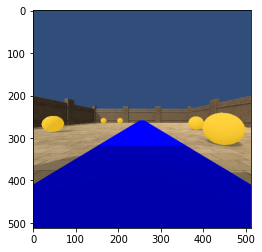

In [2]:
# env.reset()
yaml_path = '../../competition_configurations/9-5-1.yml'
# yaml_path = '../configurations/curriculum14/43.yml'

ac = ArenaConfig(yaml_path)  
env.reset(ac)
# ac.arenas[0].t
# for i in range(20):
#     x = env.step([[1,2]])
#     print(x[3]['batched_step_result'].reward)
#     print(x[1], x[2], x[3]['batched_step_result'].done, x[3]['batched_step_result'].reward)
# for i in range(20):
#     x = env.step([[0,1]])
# plt.axis('off')
plt.imshow(env.render())
# plt.savefig('/Users/ludo/Desktop/rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)

# env._env.arenas_obj_config_side_channel.arenas_config
# print(x[3]['batched_step_result'].reward)

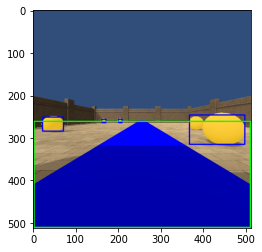

In [3]:
from animalai.envs.cvis_test import ExtractFeatures
ef = ExtractFeatures(display=True, training=False)
y = ef.run_test(env.render())
plt.imshow(ef.img[:,:,::-1])
plt.savefig('/Users/ludo/Desktop/rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)


In [ ]:
y = [ '5-4-1' , '5-4-2' , '5-4-3' , '5-5-1' , '5-5-2' , '5-6-1' , '5-6-2' , '5-6-3' , '5-7-1' , '5-7-2' , '5-7-3' , '5-8-1' , '5-8-2' , '5-8-3' , '5-9-1' , '5-9-2' , '5-9-3' , '5-10-1' , '5-10-2' , '5-10-3' , '5-11-1' , '5-11-3' , '5-12-1' , '5-12-2' , '5-12-3' , '5-5-3' , '5-11-2' , ]
0maze, 1cyl, 2trasnp, 3wout
{k:{'type':0, 'dir':0}for k in y}
{'5-4-1': {'type': 0, 'dir': 'same'},
 '5-4-2': {'type': 0, 'dir': 'same'},
 '5-4-3': {'type': 0, 'dir': 'same'},
 '5-5-1': {'type': 0, 'dir': 'right'},
 '5-5-2': {'type': 0, 'dir': 'right'},
 '5-6-1': {'type': 0, 'dir': 'left'},
 '5-6-2': {'type': 0, 'dir': 'right'},
 '5-6-3': {'type': 0, 'dir': 'right'},
 '5-7-1': {'type': 1, 'dir': 'left'},
 '5-7-2': {'type': 1, 'dir': 'left'},
 '5-7-3': {'type': 1, 'dir': 'left'},
 '5-8-1': {'type': 1, 'dir': 'right'},
 '5-8-2': {'type': 1, 'dir': 'right'},
 '5-8-3': {'type': 1, 'dir': 'right'},
 '5-9-1': {'type': 3, 'dir': 'left'},
 '5-9-2': {'type': 3, 'dir': 'left'},
 '5-9-3': {'type': 3, 'dir': 'left'},
 '5-10-1': {'type': 3, 'dir': 'right'},
 '5-10-2': {'type': 3, 'dir': 'right'},
 '5-10-3': {'type': 3, 'dir': 'right'},
 '5-11-1': {'type': 2, 'dir': 'left'},
 '5-11-3': {'type': 2, 'dir': 'left'},
 '5-11-2': {'type': 2, 'dir': 'left'}
 '5-12-1': {'type': 2, 'dir': 'right'},
 '5-12-2': {'type': 2, 'dir': 'right'},
 '5-12-3': {'type': 2, 'dir': 'right'},
 '5-5-3': {'type': 0, 'dir': 'left'},
 }

In [ ]:
def goal_over(bb1, bb2):
    if 'goal' in bb2[1]:
        return False
    if get_distance(bb1[0], bb2[0])<0.005:
        print('ye')

        if bb1[0][1]<bb2[0][1]:
            print('naa')
            return True
    return False
goal_over(y['goal1'][2], y['platform'][0])

In [ ]:
def convert_dimensions(func):
    def wrapper(*dimensions):
        """Convert from x,y,h,w to x1, x2, y1, y2"""
        # x is top left corner
        res = []

        for dims in dimensions:
            x1, y1 = dims[0], dims[1] #x, y
            x2 = x1 + dims[2] #w
            y2 = y1 + dims[3] #h
            res.append({'x1': x1, 'y1':y1, 'x2':x2, 'y2':y2})


        return func(*res)
    return wrapper



@convert_dimensions
def get_overlap(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    # assert bb1['x1'] < bb1['x2']
    # assert bb1['y1'] < bb1['y2']
    # assert bb2['x1'] < bb2['x2']
    # assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

@convert_dimensions
def get_distance(dims1, dims2):
    """Get shortest distance between two rectangles"""

    x1, y1, x1b, y1b = dims1.values()
    x2, y2, x2b, y2b = dims2.values()
    left = x2b < x1
    right = x1b < x2
    bottom = y2b < y1
    top = y1b < y2
    dist = lambda x,y: np.linalg.norm(np.array(x)-np.array(y))
    if top and left:
        return dist((x1, y1b), (x2b, y2))
    elif left and bottom:
        return dist((x1, y1), (x2b, y2b))
    elif bottom and right:
        return dist((x1b, y1), (x2, y2b))
    elif right and top:
        return dist((x1b, y1b), (x2, y2))
    elif left:
        return x1 - x2b
    elif right:
        return x2 - x1b
    elif bottom:
        return y1 - y2b
    elif top:
        return y2 - y1b
    else:             # rectangles intersect
        return 0.

In [ ]:
import cv2
cv2.imwrite('/Users/ludo/Desktop/far.png', x[3]['batched_step_result'].obs[0][0])

In [ ]:
from animalai.envs.cvis import ExtractFeatures
ef = ExtractFeatures(display=True, training=False)
data = x[3]['batched_step_result'].obs[0][0]
print(ef.run(data))
plt.imshow(ef.img)

In [ ]:
class HSV:
	"""Color lower and upper bounds in HSV format"""

	@classmethod
	def __getattribute__(cls,attr):
		return [np.array(i) for i in getattr(cls, attr)]

	green = [[33,80,40], [102,255,255]]
	# red = [[0,181,0], [6,255,255]]
	# red = [[0,184,0], [179,208,217]]
	red = [[125,16,88], [179,255,255]]
	grey = [[0,0,0], [0,0,224]]
	brown = [[7,53,40], [18,87,121]]

hsv_cls = HSV()
objects = {
	'goal': hsv_cls.green,
	# 'danger_zone': hsv_cls.red,
	# 'wall': hsv_cls.grey,
}
ef.get_contour(objects['goal'])
plt.imshow(ef.hsv_img)

In [ ]:
# env._env.DEFAULT_EDITOR_PORT
x[3]['batched_step_result'].obs[1].reshape(-1,9)[[0,11,22]][:, 0:6].flatten()

In [ ]:
res = x[3]['batched_step_result'].obs[1].flatten()[6:146].reshape(-1,14)
obj_mapper = [
             "Cardbox1",
             "Cardbox2",
             "CylinderTunnelTransparent",
             "CylinderTunnel",
             "DeathZone",
             "GoodGoalMulti",
             "GoodGoal",
             "LObject",
             "LObject2",
             "Ramp",
             "UObject",
             "WallTransparent",
             "Wall",
              "BadGoal",
              "HotZone"]
df = pd.DataFrame(res)
df.rename(inplace=True, columns={0: 'id', 1:'class', 2: 'visible', 3:'abs_pos_x', 4:'abs_pos_y', 5:'abs_pos_z', 6: 'rel_pos_x', 7: 'rel_pos_y', 8:'rel_pos_z', 9:'abs_rot', 10:'rel_rot', 11:'size_x', 12:'size_y', 13:'size_z'})
df['class'] = df['class'].apply(lambda x: obj_mapper[int(x)] if x!=-1.0 else 'null')
df_a = pd.DataFrame( x[3]['batched_step_result'].obs[1].flatten()[0:6]).T
df_a.rename(inplace=True, columns={0: 'vel_x', 1:'vel_z', 2:'rot_y', 3:'abs_pos_x', 4:'abs_pos_y', 5:'abs_pos_z'})
display(df)
display(df_a)
res = x[3]['batched_step_result'].obs[0][0]
plt.axis('off')
plt.imshow(res)

In [ ]:
obj_mapper = [
             "Cardbox1",
             "Cardbox2",
             "CylinderTunnelTransparent",
             "CylinderTunnel",
             "DeathZone",
             "GoodGoalMulti",
             "GoodGoal",
             "LObject",
             "LObject2",
             "Ramp",
             "UObject",
             "WallTransparent",
             "Wall",
              "BadGoal",
              "HotZone"]
res = x[3]['batched_step_result'].obs[1].reshape(-1,9)
df = pd.DataFrame(res[1:, :])
df.rename(inplace=True, columns={0: 'class', 1:'rotation', 2: 'occlusion%', 3:'pos_x', 4:'pos_y', 5:'pos_z', 6: 'size_x', 7: 'size_y', 8:'size_z'})
df['class'] = df['class'].apply(lambda x: obj_mapper[int(x)] if x!=-1.0 else 'null')
df_a = pd.DataFrame(res[0, :]).T
df_a.rename(inplace=True, columns={0: 'vel_x', 1:'vel_y', 2: 'vel_z', 3:'pos_x', 4:'pos_y', 5:'pos_z', 6: 'rot_x', 7: 'rot_y', 8:'rot_z'})
display(df)
display(df_a)


In [ ]:
env.close()

In [ ]:
env.reset()
for _ in range(1):
    x = env.step([[0,0]])
    res = x[3]['batched_step_result'].obs[1][0]
    plt.axis('off')
    plt.imshow(res)
#     plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)
    plt.show()
    res = x[3]['batched_step_result'].obs[1][1]
    plt.axis('off')
    plt.imshow(res)
#     plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)
    plt.show()    

In [ ]:
env.close()

In [ ]:
env.visual_obs.shape

In [ ]:
x[3]['batched_step_result'].obs[1]

In [ ]:
import sys
sys.path.insert(0, "/Users/ludo/Desktop/animalai/animalai/animalai_train")
sys.path.insert(1, "/Users/ludo/Desktop/animalai/animalai/animalai")
from animalai.envs.gym.environment import AnimalAIGym
import random
from animalai.envs.arena_config import ArenaConfig

import os
import yaml
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from animalai.envs.environment import AnimalAIEnvironment

# CONFIG
env_path = '../../env/aaio_mac'
# env_path = '../env/AnimalAI'

worker_id = 2
seed = 1
# yaml_path = '../configurations/curriculum14/45.yml'

yaml_path = '../../competition_configurations/5-11-3.yml'
# yaml_path = '../configurations/curriculum12/112.yml'
# yaml_path = "../../competition_configurations/5-8-3.yml" #'configurations/curriculum/0.yaml'

ac = ArenaConfig(yaml_path)

env = AnimalAIEnvironment(
                    file_name=env_path,
                    arenas_configurations = ac,
                    worker_id=worker_id,
                    play=True, base_port=5002,
                    alter_obs = False
                    )
# env = AnimalAIGym(environment_filename=env_path,
#               worker_id=worker_id,
#               n_arenas=1,
#               arenas_configurations=ac,

#                 seed=seed,
#                  grayscale=False)
x = env.step()

# plt.axis('off')
# plt.imshow(env.visual_obs)
# plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)


In [ ]:
env.close()

In [ ]:

x[1].rl_output.agentInfos['AnimalAI?team=0'].value[0].observations[0].float_data
# .Clear()

In [ ]:
y = [0.0, -0.3539848327636719, 0.0, 16.634414672851562, 0.4917698800563812, 16.636703491210938, -0.0, 117.50151062011719, -0.0, 12.0, 84.5000228881836, 25.35931396484375, 26.27842903137207, 2.5103018283843994, 7.750280857086182, 12.421944618225098, 5.0373125076293945, 0.9563466310501099, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 5, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [ ]:
from mlagents_envs.communicator_objects.observation_pb2 import ObservationProto


In [ ]:
dir(x[1].rl_output.agentInfos['AnimalAI?team=0'].value[0].observations[0].float_data)

In [ ]:
me = x[1].rl_output.agentInfos['AnimalAI?team=0'].value[0].observations[0].float_data


In [ ]:
me.CopyFrom(x[1].rl_output.agentInfos['AnimalAI?team=0'].value[0].observations[0].float_data)

In [ ]:
me

In [ ]:
ObservationProto.

In [ ]:
y = ObservationProto.FloatData()

In [ ]:
del person.things[:]
y.data.extend([3,4,2])

In [ ]:
y

In [ ]:
x[3]['batched_step_result'].obs[1].shape

In [ ]:
print(visible)

In [ ]:
x

In [ ]:
x[3]['batched_step_result'].obs[1].flatten().shape

In [ ]:
df[df['id']!=-1].set_index('id')

In [ ]:
obj_mapper = [
             "Cardbox1",
             "Cardbox2",
             "CylinderTunnelTransparent",
             "CylinderTunnel",
             "DeathZone",
             "GoodGoalMulti",
             "GoodGoal",
             "LObject",
             "LObject2",
             "Ramp",
             "UObject",
             "WallTransparent",
             "Wall",
              "BadGoal",
              "HotZone"]
def obs2state(vector_obs):
    obj_df = pd.DataFrame(vector_obs[6:146].reshape(-1,14))
    obj_df.rename(inplace=True, columns={0: 'id', 1:'class', 2: 'visible', 3:'abs_pos_x', 4:'abs_pos_y', 5:'abs_pos_z', 6: 'rel_pos_x', 7: 'rel_pos_y', 8:'rel_pos_z', 9:'abs_rot', 10:'rel_rot', 11:'size_x', 12:'size_y', 13:'size_z'})
    obj_df['class'] = obj_df['class'].apply(lambda x: obj_mapper[int(x)] if x!=-1.0 else 'null')
    obj_df = obj_df[obj_df['id']!=-1]
    obj_df['id'] = (obj_df['id']*-1).astype(int)
    obj_df = obj_df.set_index('id')

    # df_a = pd.DataFrame(vector_obs[0:6]).T
    # df_a.rename(inplace=True, columns={0: 'vel_x', 1:'vel_z', 2:'rot_y', 3:'abs_pos_x', 4:'abs_pos_y', 5:'abs_pos_z'})

    rays = vector_obs[146:151].flatten()
    wtlm = np.matrix(vector_obs[151:167].flatten()).reshape(4,4)

    res = {
        "agent": vector_obs[0:6], #df
        "objects": obj_df, #df
        "rays": rays, # np
        "transform": wtlm, # np
    }
    return res
def preprocess(step_results):
    vector_obs = step_results[3]['batched_step_result'].obs[1].flatten()
    tmin1 = obs2state(vector_obs[:167])
    t = obs2state(vector_obs[167:])

    res = {
        "t-1": tmin1, #df
        "t": t, #df
        "reward": step_results[1], #float
        "done": step_results[2], # bool
        "step": step_results[-1] 
    }
    return res

In [ ]:
y = preprocess(x)
y['t']['objects']

In [ ]:
import math
def transform(matrix, obj):
    """Transform world position of vector to local position relative to agent"""
    # obj = np.matrix(obj/40 - agent)
    obj.resize(4, refcheck=False) # adds 
    res  = matrix * obj.reshape(4,1)
    return res
def go_behind(step_results, x):
    """Go behind object x. x is an id. x comes in as "x,y"""
    x = int(x.split(',')[0])
    res = np.zeros(20)
    mstate = preprocess(step_results)
    for c, timestep in enumerate(['t-1', 't']):
        state = mstate[timestep]
        ooi_pos = np.array(state['objects'].loc[x, ['abs_pos_x', 'abs_pos_y', 'abs_pos_z']])
        agent_pos = state['agent'][3:6]
        rel_pos = ooi_pos-agent_pos
        magn = np.linalg.norm(rel_pos)
        behind_pos = rel_pos*(magn+0.125)/magn # 0.125 => 5units in world
        local_behind_pos = transform(state['transform'], behind_pos)
#         rel_rot = math.atan2(local_behind_pos[0], local_behind_pos[1])
#         print(rel_rot)
        res[0+(10*c):2+(10*c)] = state['agent'][:2]
        res[2+(10*c)] = state['objects'].loc[x,'rel_rot']
        res[3+(10*c):5+(10*c)] = [local_behind_pos[0], local_behind_pos[2]] #only want x,z
        res[5+(10*c):10+(10*c)] = state['rays']
    return res

res = go_behind(x, '468,454')

In [ ]:
orig = [ 0.32875911, -0.4170535 ]
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter([res[13], orig[0]], [res[14], orig[1]])

In [ ]:
import numpy as np
fh = open('/Users/ludo/Desktop/foo.txt', 'rb')
ba = bytearray(fh.read())


In [ ]:
from PIL import Image
import numpy as np
fh = open('/Users/ludo/Desktop/foo.txt', 'rb')
ba = bytearray(fh.read())
data = np.array(list(ba)).reshape(84,84,3)
img = Image.frombytes('RGB', (84,84), data)
img.show()


In [ ]:
import io
fh = open('/Users/ludo/Desktop/Foo.txt', 'rb')
s = fh.read()
print(len(s))
# img = Image.open(io.StringIO(s))
nparr = np.fromstring(s, np.uint8)
nparr.shape
# data = bytes(s)
img = Image.frombytes('RGB', (84,84), s)


In [ ]:
from PIL import Image
# import StringIO
stream = StringIO.StringIO(s)
img = Image.open(stream)
img.sizedata = array.array('B', s)
# img = Image.frombytes('RGB', (84,84), data)


In [ ]:
import cv2

fn ="/Users/ludo/Desktop/6f8655d4-cf13-4cfa-8f15-754b37d57937.jpg"
img = cv2.imread(fn)
print(img.shape)
# resize = ResizeWithAspectRatio(img, width=560) # Resize by width OR
cv2.imshow("img", img)
cv2.waitKey(30000)
cv2.destroyAllWindows()